In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import os

In [17]:
url = "https://raw.githubusercontent.com/datasets/population/master/data/population.csv"
df = pd.read_csv(url)
print("✅ Dataset loaded successfully!")
print(df.head())

✅ Dataset loaded successfully!
  Country Name Country Code  Year    Value
0        Aruba          ABW  1960  54922.0
1        Aruba          ABW  1961  55578.0
2        Aruba          ABW  1962  56320.0
3        Aruba          ABW  1963  57002.0
4        Aruba          ABW  1964  57619.0


In [18]:
iso_codes = [country.alpha_3 for country in pycountry.countries]
df_countries = df[df['Country Code'].isin(iso_codes)]
print(f"Dataset after filtering real countries: {df_countries.shape}")

Dataset after filtering real countries: (13730, 4)


In [90]:
data_2023 = df_countries[df_countries['Year'] == 2023]
top10 = data_2023.sort_values(by='Value', ascending=False).head(10)

print("\nTop 10 Most Populated Countries in 2023:")
print(top10[['Country Name', 'Value']])


Top 10 Most Populated Countries in 2023:
             Country Name         Value
7039                India  1.438070e+09
2623                China  1.410710e+09
16033       United States  3.349149e+08
6847            Indonesia  2.811901e+08
11775            Pakistan  2.475045e+08
11135             Nigeria  2.278829e+08
1919               Brazil  2.111407e+08
1343           Bangladesh  1.714670e+08
12897  Russian Federation  1.438261e+08
9855               Mexico  1.297398e+08


In [95]:
os.makedirs("images", exist_ok=True)
os.makedirs("data", exist_ok=True)


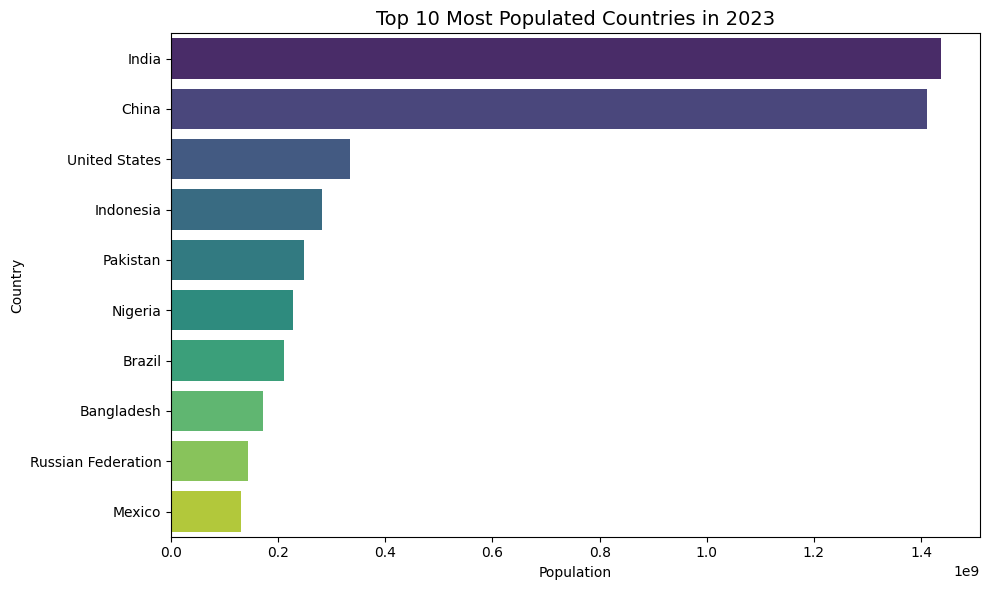

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x='Value', y='Country Name', data=top10,
            hue='Country Name', dodge=False, palette='viridis', legend=False)
plt.title("Top 10 Most Populated Countries in 2023", fontsize=14)
plt.xlabel("Population")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("images/top10_countries.png", dpi=300)
plt.show()

In [25]:
latest_year = df_countries['Year'].max()  # find the latest year in your dataset
df_latest = df_countries[df_countries['Year'] == latest_year]

In [26]:
top10 = df_latest.sort_values(by='Value', ascending=False).head(10)

In [27]:
top5_countries = top10['Country Name'].head(5).tolist()

In [28]:
trend = df_countries[(df_countries['Country Name'].isin(top5_countries)) & 
                     (df_countries['Year'] >= 2000)]

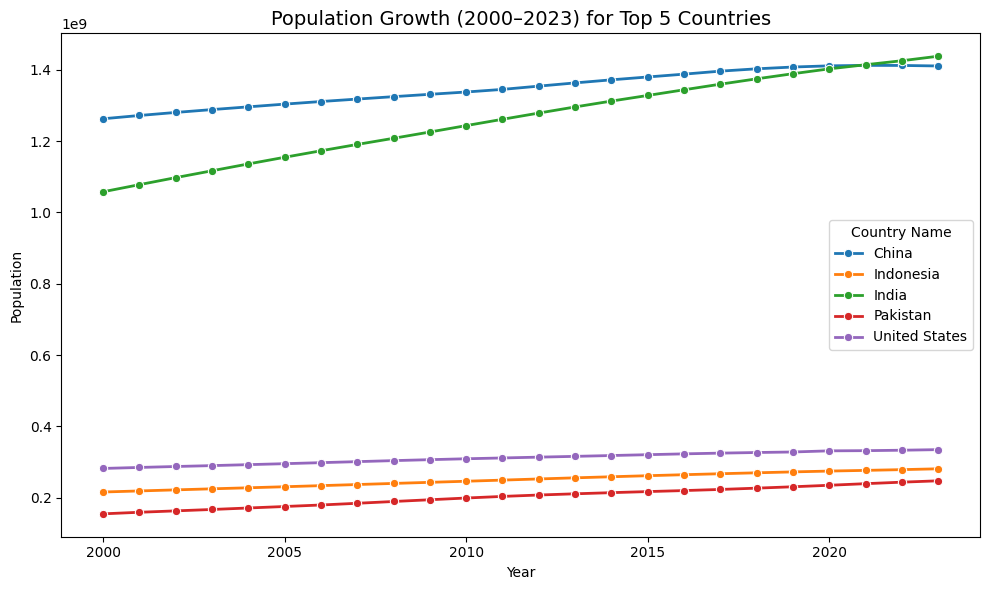

In [29]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend, x='Year', y='Value', hue='Country Name', marker='o', linewidth=2)
plt.title(f"Population Growth (2000–{latest_year}) for Top 5 Countries", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population")
plt.tight_layout()
plt.savefig("images/population_growth_top5.png")
plt.show()

In [30]:
top10.to_csv("data/top10_population_2023.csv", index=False)
print("\n✅ Analysis complete. Charts and CSV saved!")


✅ Analysis complete. Charts and CSV saved!
